no display found. Using non-interactive Agg backend


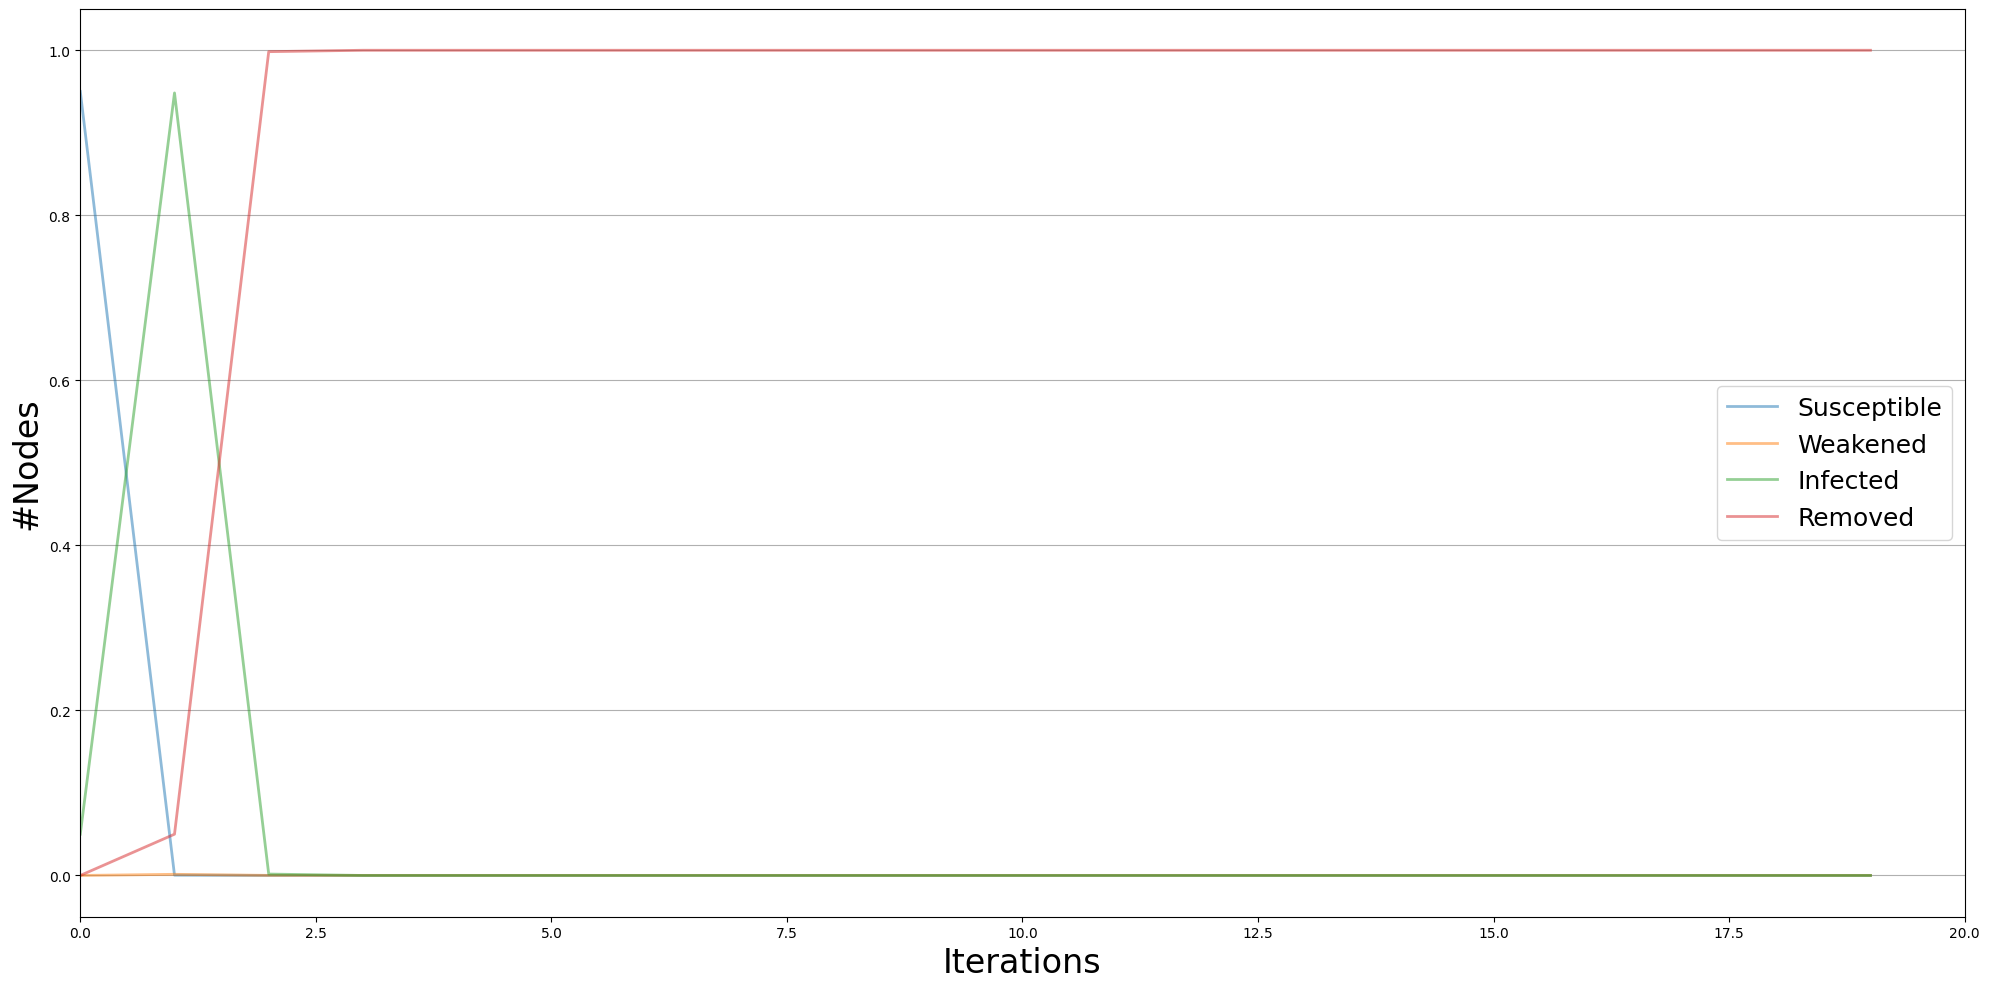

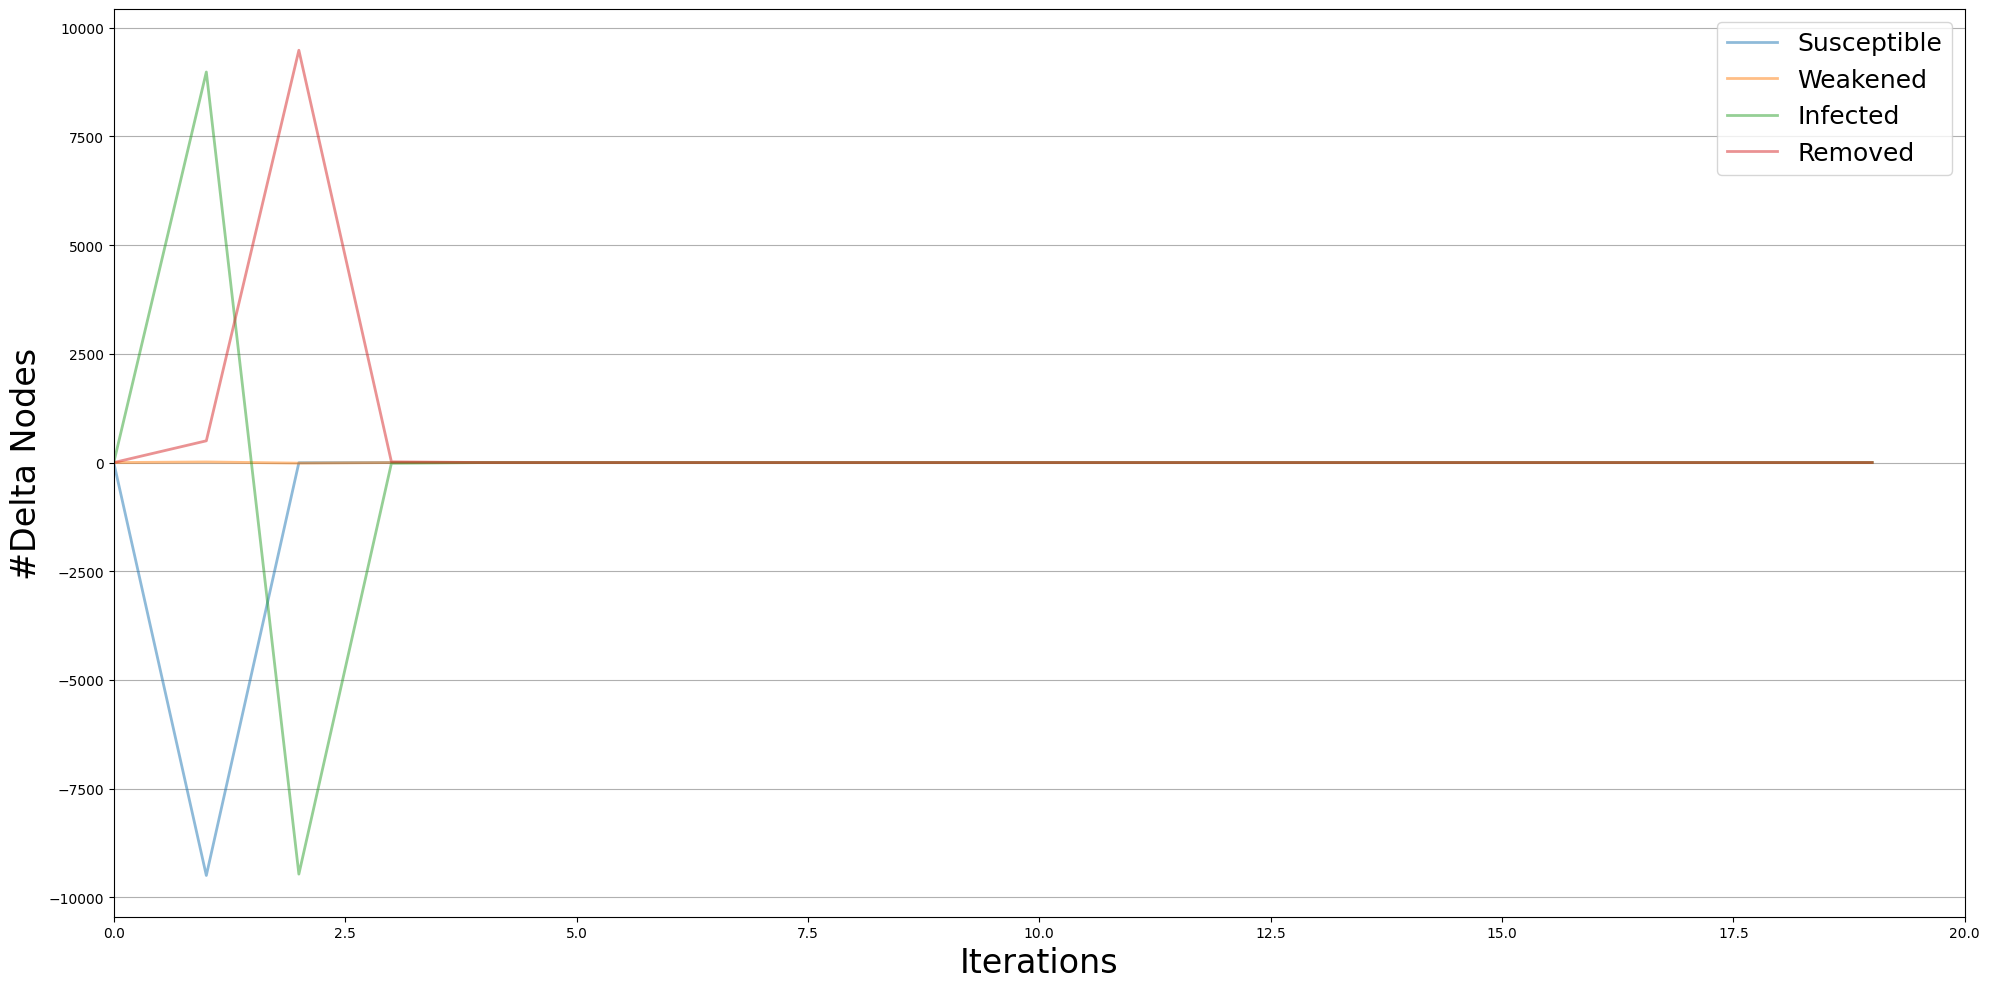

In [1]:
'''At time t a node in the state I is selected randomly and the states of all neighbors are checked one by one. If the 
state of a neighbor is S then this state changes either 
i) to I with probability kappa or 
ii) to W with probability mu. 
If the state of a neighbor is W then the state W changes to  I with probability nu. We repeat the above process for all nodes in state I and then changes to R for each associated node.

Statuses:
    S - Susceptible | 0
    I - Infected    | 1
    W - Weakened      | 2
    R - Removed   | 3
    
Parameters:
    kappa - Transmission rate
    mu - probability of susceptible nodes to become weakened
    nu - probability of weakened nodes to become infected
    fraction_infected - Fraction of infected nodes at the beginning of the simulation
'''
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(10000, 0.1)

# Model selection
model = ep.SWIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('kappa', 0.01)
cfg.add_model_parameter('mu', 0.005)
cfg.add_model_parameter('nu', 0.05)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()